<a href="https://colab.research.google.com/github/shourya-2407/Image-Classification/blob/master/Shourya_Shelke_DSAI_CV_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMPUTER VISION TASK - DSAI INDUCTIONS 2020 

This Notebook contains starter code for the Computer Vision Task for DSAI Inductions. We have used PyTorch here, but you are free to use any relevant Deep Learning framework like TensorFlow,Trax; However PyTorch is now like the international research standard for Deep Learning, so using PyTorch for the task would be appreciated.  

The task involves classification of images on the SVHN classification dataset.
SVHN stands for Street View House Numbers. Similar to MNIST, SVHN classification is a digit recognition task. Answer classes range from 0 to 9.
You should prepare a model and report test set accuracy and submit the following to us for evaluation:

For PyTorch Users:
1. model.pt file  
2. model.py file
3. link to Colab notebook

For Tensorflow Users:
1. .h5 file of model and weights
2. link to Colab notebook

The colab notebook should have proper comments describing the code.

Note: There are 2 variants of SVHN available on the internet. One involving Bounding Box Detection + Classification and the second involving only classification. We are only concerned with the latter (i.e. Classification only dataset). It is also refered to as svhn_cropped in alternate texts.

In [ ]:

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import scipy.io as sio

# Necessary Imports to run this starter code

In [ ]:
transform = transforms.Compose([
                    
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Transforms to convert Image --> Tensor

In [ ]:
trainset  = torchvision.datasets.SVHN('./data', split='train',download=True,transform=transform)
testset =  torchvision.datasets.SVHN('./data', split='test',download=True,transform=transform)

# Download Train and Test Dataset

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=testset,
                                              batch_size=64,
                                              shuffle=True,
                                              )
test_loader = torch.utils.data.DataLoader(dataset=trainset,
                                              batch_size=64,
                                              shuffle=True,
                                              )
# Set up the dataloaders to be used in training and testing

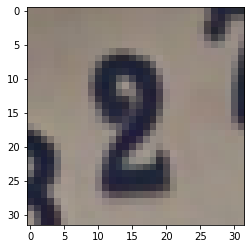

Label :  2


In [ ]:
# Optional Code just for visualization

image_ind = 98  # Any index you want to visualize
train_data = sio.loadmat('./data/train_32x32.mat')

# access to the dict
x_train = train_data['X']
y_train = train_data['y']

# show sample
plt.imshow(x_train[:,:,:,image_ind])
plt.show()


print("Label : ", y_train[image_ind].item())

#**USING KERAS**

##**Important Libraries**

In [ ]:
# Libraries
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import  TensorBoard
import matplotlib.pyplot as plt
from google.colab import drive
import time

In [ ]:
NAME = 'SVHN_CNN-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='drive/My Drive/Colab Notebooks/logs/{}'.format(NAME))


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive



#Data Processing
#Uploading the dataset

In [ ]:
train_data = loadmat('drive/My Drive/Colab Notebooks/train_32x32.mat')
test_data = loadmat ('drive/My Drive/Colab Notebooks/test_32x32.mat')

##**Data Normalization**

In [ ]:
# Splitting train and test data into X and y
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
X_train, X_test = X_train / 255.0, X_test / 255.0



###**Transposing the image arrays**

In [ ]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]



In [ ]:
#Converting class "10" to class "0"
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


##**Training Dataset Splitting**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.2, random_state = 0)

##**MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = Sequential()

# First Layer
model.add(Convolution2D(32, [3, 3], input_shape=(32, 32, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second Layer
model.add(Convolution2D(32, [3, 3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Layer
model.add(Dropout(0.25))
model.add(Convolution2D(64, [3, 3], padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Fourth Layer
model.add(Convolution2D(64, [3, 3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(200))

# Output Layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size = 128, epochs= 10, verbose= 1, callbacks=[tensorboard])

Epoch 1/10
458/458 [==============================] - 5s 12ms/step - loss: 0.8724 - accuracy: 0.7254 - val_loss: 0.4378 - val_accuracy: 0.8696
Epoch 2/10
458/458 [==============================] - 5s 10ms/step - loss: 0.4541 - accuracy: 0.8611 - val_loss: 0.3400 - val_accuracy: 0.8984
Epoch 3/10
458/458 [==============================] - 5s 10ms/step - loss: 0.3866 - accuracy: 0.8824 - val_loss: 0.3111 - val_accuracy: 0.9070
Epoch 4/10
458/458 [==============================] - 5s 10ms/step - loss: 0.3466 - accuracy: 0.8936 - val_loss: 0.2808 - val_accuracy: 0.9191
Epoch 5/10
458/458 [==============================] - 5s 11ms/step - loss: 0.3143 - accuracy: 0.9043 - val_loss: 0.2721 - val_accuracy: 0.9212
Epoch 6/10
458/458 [==============================] - 5s 10ms/step - loss: 0.2884 - accuracy: 0.9135 - val_loss: 0.3424 - val_accuracy: 0.8952
Epoch 7/10
458/458 [==============================] - 5s 11ms/step - loss: 0.2757 - accuracy: 0.9163 - val_loss: 0.2462 - val_accuracy: 0.9309

##**EVALUATION**

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [ ]:
val_loss, val_acc = model.evaluate (X_test, y_test)

814/814 [==============================] - 3s 3ms/step - loss: 0.2540 - accuracy: 0.9276


In [ ]:
print(val_loss)


0.25397789478302


In [ ]:
print(val_acc)

0.9276275634765625


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 


In [ ]:
!ls saved_model/my_model

assets	saved_model.pb	variables


#Click on the share button in the top right corner of this notebook, copy the link and send it to us along with the other files

Refer to [this](https://colab.research.google.com/drive/1OYAbJ_t8ZAIjy4aT_mFgPGkhRPB2X5Iy?usp=sharing) notebook for a complete working example of Image Classification on MNIST.
Save a copy in your google drive account

For Tensorflow(Keras) users, refer to this [link](https://www.tensorflow.org/guide/keras/save_and_serialize) for saving the .h5 file

Hints to solve the task:
1. Refer to the DSAI Session 1 recording [here](https://web.microsoftstream.com/video/9616fbd1-f2ec-4c7f-82d3-c8192719d482)
2. CNNs work very well for Image Classification tasks
3. CNNs are data hungry, more the data better the accuracy.

For any questions related to the task, Contact :
1. Shaunak Halbe
2. Ph : 7588170950 (Whatsapp No.)
3. E-mail: halbesa18.comp@coep.ac.in